In [321]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
main_df = pd.read_csv("student.csv")

In [322]:
def accuracy(X, Y, W):
    y_pred = np.dot(X, W) 
    y_pred = np.array(y_pred, dtype = 'int64')
    acc = (1 - np.sum(np.absolute(y_pred - Y))/Y.shape[0])*100
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [323]:
                                            #preprocessing stage

In [324]:
main_df.isna().sum()  ##remove null values

school         0
sex            0
age           15
address        0
Medu           0
Fedu           0
studytime      0
failures       0
activities     0
nursery        0
higher         0
freetime       0
goout          0
health         0
absences       0
G1             0
G2             0
G3             0
dtype: int64

In [325]:
main_df["age"].value_counts() ##here according to data there are two students with outlier values. (21, 22). 
## So that can deviate the mean by some amount. So we can consider median over mean for this feature to fill the na 
## values

16.0    97
17.0    97
15.0    79
18.0    79
19.0    23
20.0     3
21.0     1
22.0     1
Name: age, dtype: int64

In [326]:
age_mean = main_df['age'].mean()
age_median = main_df['age'].median()

print("mean : ", age_mean)
print("median : ", age_median)

## mean value is less here than median. So there is very little deviation of mean due to outliers. So we use mean to fill the data.

mean :  16.705263157894738
median :  17.0


In [327]:
main_df["age"].fillna(age_mean, inplace = True) ##now we have removed all the na values.

In [328]:
main_df.isna().sum()

school        0
sex           0
age           0
address       0
Medu          0
Fedu          0
studytime     0
failures      0
activities    0
nursery       0
higher        0
freetime      0
goout         0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [329]:
cat_columns = main_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)


Categorial Data :  Index(['school', 'sex', 'address', 'activities', 'nursery', 'higher'], dtype='object')


In [330]:
print(main_df["school"].unique())
print(main_df["sex"].unique())
print(main_df["address"].unique())
print(main_df["activities"].unique())
print(main_df["nursery"].unique())
print(main_df["higher"].unique())

['GP' 'MS']
['F' 'M']
['U' 'R']
['no' 'yes']
['yes' 'no']
['yes' 'no']


In [331]:
school_encode = pd.get_dummies(main_df.school)
sex_encode = pd.get_dummies(main_df.sex)
address_encode = pd.get_dummies(main_df.address)
activities_encode = pd.get_dummies(main_df.activities)
nursery_encode = pd.get_dummies(main_df.nursery)
higher_encode = pd.get_dummies(main_df.higher)

In [332]:
merged_df = pd.concat([main_df, school_encode, sex_encode, address_encode, activities_encode, nursery_encode, higher_encode], axis = 'columns')

In [333]:
print(merged_df.head(100))

   school sex        age address  Medu  Fedu  studytime  failures activities  \
0      GP   F  18.000000       U     4     4          2         0         no   
1      GP   F  17.000000       U     1     1          2         0         no   
2      GP   F  15.000000       U     1     1          2         3         no   
3      GP   F  15.000000       U     4     2          3         0        yes   
4      GP   F  16.000000       U     3     3          2         0         no   
..    ...  ..        ...     ...   ...   ...        ...       ...        ...   
95     GP   F  15.000000       R     1     1          4         1        yes   
96     GP   M  16.000000       R     4     3          1         0        yes   
97     GP   F  16.000000       U     2     1          2         0         no   
98     GP   F  16.705263       U     4     4          1         0        yes   
99     GP   F  16.000000       U     4     3          3         0         no   

   nursery  ...  F  M  R  U  no  yes  n

In [334]:
merged_df.columns

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'studytime',
       'failures', 'activities', 'nursery', 'higher', 'freetime', 'goout',
       'health', 'absences', 'G1', 'G2', 'G3', 'GP', 'MS', 'F', 'M', 'R', 'U',
       'no', 'yes', 'no', 'yes', 'no', 'yes'],
      dtype='object')

In [335]:
merged_df.drop(['school', 'sex', 'address', 'nursery', 'higher', 'activities', 'F', 'R', 'no', 'no', 'no', 'GP'], axis = 'columns', inplace = True)

In [336]:
cat_columns = merged_df.select_dtypes(exclude=["number","bool_"])
print("Categorial Data : ", cat_columns.columns)   #no categorical features left

Categorial Data :  Index([], dtype='object')


In [337]:
merged_df.index[merged_df.duplicated()]    #no duplicate rows

Int64Index([], dtype='int64')

In [338]:
                                    #univariate Closed Form 

In [339]:
main_df = main_df[main_df['G2'] != 0]
main_df = main_df[main_df['G3'] != 0]
main_df.shape
main_df["G3"].value_counts

<bound method IndexOpsMixin.value_counts of 0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 357, dtype: int64>

(357, 1)
(357, 1)


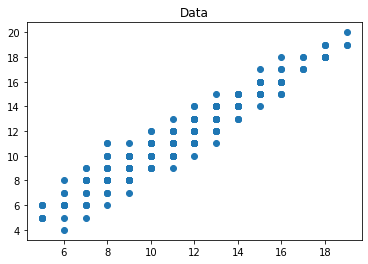

In [340]:
X_u = main_df["G2"].values
y_u = main_df["G3"].values
X = main_df["G2"].values
y = main_df["G3"].values
m = X.shape[0]
X_u = X_u.reshape(m, 1)
y_u = y_u.reshape((-1, 1))
print(X_u.shape)
print(y_u.shape)
plt.figure()
plt.scatter(X_u, y_u)
plt.title("Data")
plt.show()

In [341]:
uni_df = main_df

In [342]:
uni_df = uni_df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(uni_df))
# Split your dataset 
X_train_u = X_u[:train_size]
X_test_u = X_u[train_size:]
X = X[:train_size]
y = y[train_size:]
y_train_u = y_u[:train_size]
y_test_u = y_u[train_size:]

#Lets create a matrix with single column of ones


m = X_train_u.shape[0]
n = X_test_u.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]
X_train_u = X_train_u.reshape((m, 1))
X_test_u = X_test_u.reshape((n, 1))
print(X_train_u.shape)
print(X_test_u.shape)
print(y_train_u.shape)
print(y_test_u.shape)

(249, 1)
(108, 1)
(249, 1)
(108, 1)


In [343]:
m = X_train_u.shape[0]
n = X_test_u.shape[0]

In [344]:
#run only once

X_0_u = np.ones((m, 1))
X_0_u.shape
X_train_u = np.hstack((X_train_u, X_0_u))
X_train_u.shape


(249, 2)

In [345]:
def predict(X_m, theta):
    return np.dot(X_m, theta)
    

In [346]:
def getClosedForm(X_m, y):
    y = np.mat(y)
    p_1 = np.dot(X_m.T, X_m)
    p_2 = np.dot(X_m.T, y)
    
    theta = np.linalg.pinv(p_1) * p_2
    return theta

In [347]:
# X_0_u = np.ones((m, 1))
# X_train_u = np.hstack((X_train_u, X_0_u))




In [348]:
print(X_train_u.shape)

(249, 2)


In [349]:
theta_u = getClosedForm(X_train_u, y_train_u)
print("Theta values : ", theta_u)
theta_u.shape


Theta values :  [[0.98627147]
 [0.31590181]]


(2, 1)

In [350]:
X_0_u = np.ones((m + n, 1))
X_u_1 = np.hstack((X_u, X_0_u))


In [351]:
y_pred = predict(X_u_1, theta_u)

In [352]:
print(y_pred.shape)

(357, 1)


In [353]:
print(X_test_u[:5])

[[10]
 [12]
 [ 9]
 [ 9]
 [ 8]]


In [354]:
cost = mse(X_u_1, y_u, theta_u)
print(cost)

0.5039882203608324


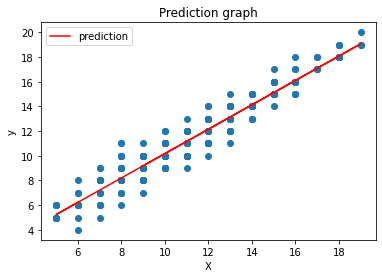

In [355]:
plt.figure()
plt.scatter(X_u, y_u)
plt.plot(X_u, y_pred, color = "red", label = "prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Prediction graph")
plt.show()

In [356]:
X_0_u = np.ones((n, 1))
X_test_u = np.hstack((X_test_u, X_0_u))

In [357]:
acc = accuracy(X_test_u, y_test_u, theta_u)

Accuracy of the model is :  49.07 %


In [358]:
                                #Closed Form Multivariate

In [359]:

X_col = merged_df[["G1", "G2"]].values
y_col = merged_df[["G3"]].values
m = X_col.shape[0]
multi_df = merged_df

In [360]:
multi_df = merged_df.sample(frac=1)

train_size = int(0.7 * len(multi_df))
# Split your dataset 
X_train_m = X_col[:train_size]
X_test_m = X_col[train_size:]
y_train_m = y_col[:train_size]
y_test_m = y_col[train_size:]

#Lets create a matrix with single column of ones


m = X_train_m.shape[0]
n = X_test_m.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]

print(X_train_u.shape)
print(X_test_u.shape)
print(y_train_u.shape)
print(y_test_u.shape)

(249, 2)
(108, 2)
(249, 1)
(108, 1)


In [361]:
# X_col = X_col.reshape(X_col.shape[0], 2)
# y_col = y_col.reshape((-1, 1))

In [362]:
X_0 = np.ones((m, 1))
X_train_m = np.hstack((X_train_m, X_0))
X_train_m.shape

(276, 3)

In [363]:
print(X_train_m[:5])

[[ 5.  6.  1.]
 [ 5.  5.  1.]
 [ 7.  8.  1.]
 [15. 14.  1.]
 [ 6. 10.  1.]]


In [364]:
def predict(X_col, theta):
    return np.dot(X_col, theta)

In [365]:
def getClosedForm(X_col, y_col):
    print(y_col.shape)
    y_col = np.mat(y_col)
    print(y_col.shape)
    p_1 = np.dot(X_col.T, X_col)
    p_2 = np.dot(X_col.T, y_col)
    
    theta = np.linalg.pinv(p_1) * p_2
    return theta

In [366]:
theta_closed_m = getClosedForm(X_train_m, y_train_m)
print("Theta values : ", theta_closed_m)
theta_closed_m.shape

(276, 1)
(276, 1)
Theta values :  [[ 0.11973921]
 [ 0.98213737]
 [-1.25343076]]


(3, 1)

In [367]:
#Pending task : have to plot graph for multivariate :( and train and test data 

In [368]:
def mse(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

In [369]:
X_0 = np.ones((n, 1))
X_test_m = np.hstack((X_test_m, X_0))

In [370]:
cost = mse(X_test_m, y_test_m, theta_closed_m)
print(cost)

1.2958291788964833


In [371]:
acc = accuracy(X_test_m, y_test_m, theta_closed_m)

Accuracy of the model is :  -35.29 %


In [372]:
                                #Closed Form Multivariate all features

In [373]:
X_col_all = merged_df.drop(["G3"], 1).values
y_col_all = merged_df[["G3"]].values

In [374]:
print(X_col_all.shape)
print(y_col_all.shape)

(395, 17)
(395, 1)


In [375]:
multi_df_all = merged_df.sample(frac=1)

train_size = int(0.7 * len(multi_df_all))
# Split your dataset 
X_train_all = X_col_all[:train_size]
X_test_all = X_col_all[train_size:]
y_train_all = y_col_all[:train_size]
y_test_all = y_col_all[train_size:]

#Lets create a matrix with single column of ones


m = X_train_all.shape[0]
n = X_test_all.shape[0]
X_u0 = np.ones((m, 1))
X_u0[:5]

print(X_train_all.shape)
print(X_test_all.shape)
print(y_train_all.shape)
print(y_test_all.shape)


(276, 17)
(119, 17)
(276, 1)
(119, 1)


In [376]:
X_0 = np.ones((m, 1))
X_train_all = np.hstack((X_train_all, X_0))
X_train_all.shape

(276, 18)

In [377]:
print(X_train_all[:5])

[[18.  4.  4.  2.  0.  3.  4.  3.  6.  5.  6.  0.  0.  1.  0.  1.  1.  1.]
 [17.  1.  1.  2.  0.  3.  3.  3.  4.  5.  5.  0.  0.  1.  0.  0.  1.  1.]
 [15.  1.  1.  2.  3.  3.  2.  3. 10.  7.  8.  0.  0.  1.  0.  1.  1.  1.]
 [15.  4.  2.  3.  0.  2.  2.  5.  2. 15. 14.  0.  0.  1.  1.  1.  1.  1.]
 [16.  3.  3.  2.  0.  3.  2.  5.  4.  6. 10.  0.  0.  1.  0.  1.  1.  1.]]


In [378]:
theta_closed_all = getClosedForm(X_train_all, y_train_all)
print("Theta values : ", theta_closed_all)
theta_closed_all.shape

(276, 1)
(276, 1)
Theta values :  [[ 3.15545762e-02]
 [ 1.31123242e-01]
 [-1.45443597e-01]
 [-2.48953185e-01]
 [-2.99572976e-01]
 [ 2.11604989e-02]
 [-4.68639836e-02]
 [ 2.89674170e-02]
 [ 2.54902364e-02]
 [ 9.97280717e-02]
 [ 9.68463782e-01]
 [-1.10762425e-16]
 [ 6.16407883e-02]
 [-9.30359547e-02]
 [-1.14443803e-01]
 [-2.74583891e-01]
 [ 9.94482142e-01]
 [-1.58020438e+00]]


(18, 1)

In [379]:
X_0 = np.ones((n, 1))
X_test_all = np.hstack((X_test_all, X_0))

In [380]:
cost = mse(X_test_all, y_test_all, theta_closed_all)
print(cost)

1.303762422850406


In [381]:
acc = accuracy(X_test_all, y_test_all, theta_closed_all)

Accuracy of the model is :  -38.66 %
